# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 

### Question(s) for Analysis
- Is there a relationship between the years and the number of films?
- How long is the average movie?
- Top 10 of movies Directors in 2011? "based on Movie Ratings"

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pandas, since package 'wheel' is not installed.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.3
    Uninstalling pandas-1.3.3:
      Successfully uninstalled pandas-1.3.3
    Running setup.py install for pandas: started
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\besso\appdata\local\programs\python\python39\lib\site-packages\pandas-1.3.3.dist-info\
   from C:\Users\Besso\AppData\Local\Programs\Python\Python39\Lib\site-packages\~andas-1.3.3.dist-info
  Moving to c:\users\besso\appdata\local\programs\python\python39\lib\site-packages\pandas\
   from C:\Users\Besso\AppData\Local\Programs\Python\Python39\Lib\site-packages\~andas


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Besso\AppData\Local\Programs\Python\Python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Besso\\AppData\\Local\\Temp\\pip-install-3jdesp2j\\pandas_97460c6554f245a187cc99d25de3e650\\setup.py'"'"'; __file__='"'"'C:\\Users\\Besso\\AppData\\Local\\Temp\\pip-install-3jdesp2j\\pandas_97460c6554f245a187cc99d25de3e650\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\Besso\AppData\Local\Temp\pip-record-rg5p5prc\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\Besso\AppData\Local\Programs\Python\Python39\Include\pandas'
         cwd: C:\Users\Besso\AppData\Local\Temp\pip-install-3jdes

<a id='wrangling'></a>
## Data Wrangling


In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data (using pd.read_csv).
df = pd.read_csv('tmdb-movies.csv')
df.head(21)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [ ]:
# Load information about data set (using df.info()) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning
1. Drop columns that we will not needed.
2. Drop the duplicacy value.
3. Drop the null values.


In [ ]:
# Drop columns that we will not needed (using df.drop()).
df.drop(['id','imdb_id','popularity','budget','revenue',
        'original_title','cast','homepage','tagline','overview',
        'genres','production_companies','release_date','vote_count',
        'budget_adj','revenue_adj'], axis=1, inplace=True)

In [ ]:
# Drop the duplicacy value (using df.drop_duplicates()).
df.drop_duplicates(inplace=True)

In [ ]:
# Drop the null and zero values (using df.replace() and df.dropna()).
df = df.replace(0, np.nan)
df = df.dropna()

In [ ]:
# Load information about data set aftar cleaning (using df.info()).
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9343 entries, 0 to 10865
Data columns (total 5 columns):
director        9343 non-null object
keywords        9343 non-null object
runtime         9343 non-null float64
vote_average    9343 non-null float64
release_year    9343 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 438.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1  (Is there a relationship between the years and the number of films?)
- calculate the number of movies in each year and sort the years.
- visualize the result.

Text(0,0.5,'Year')

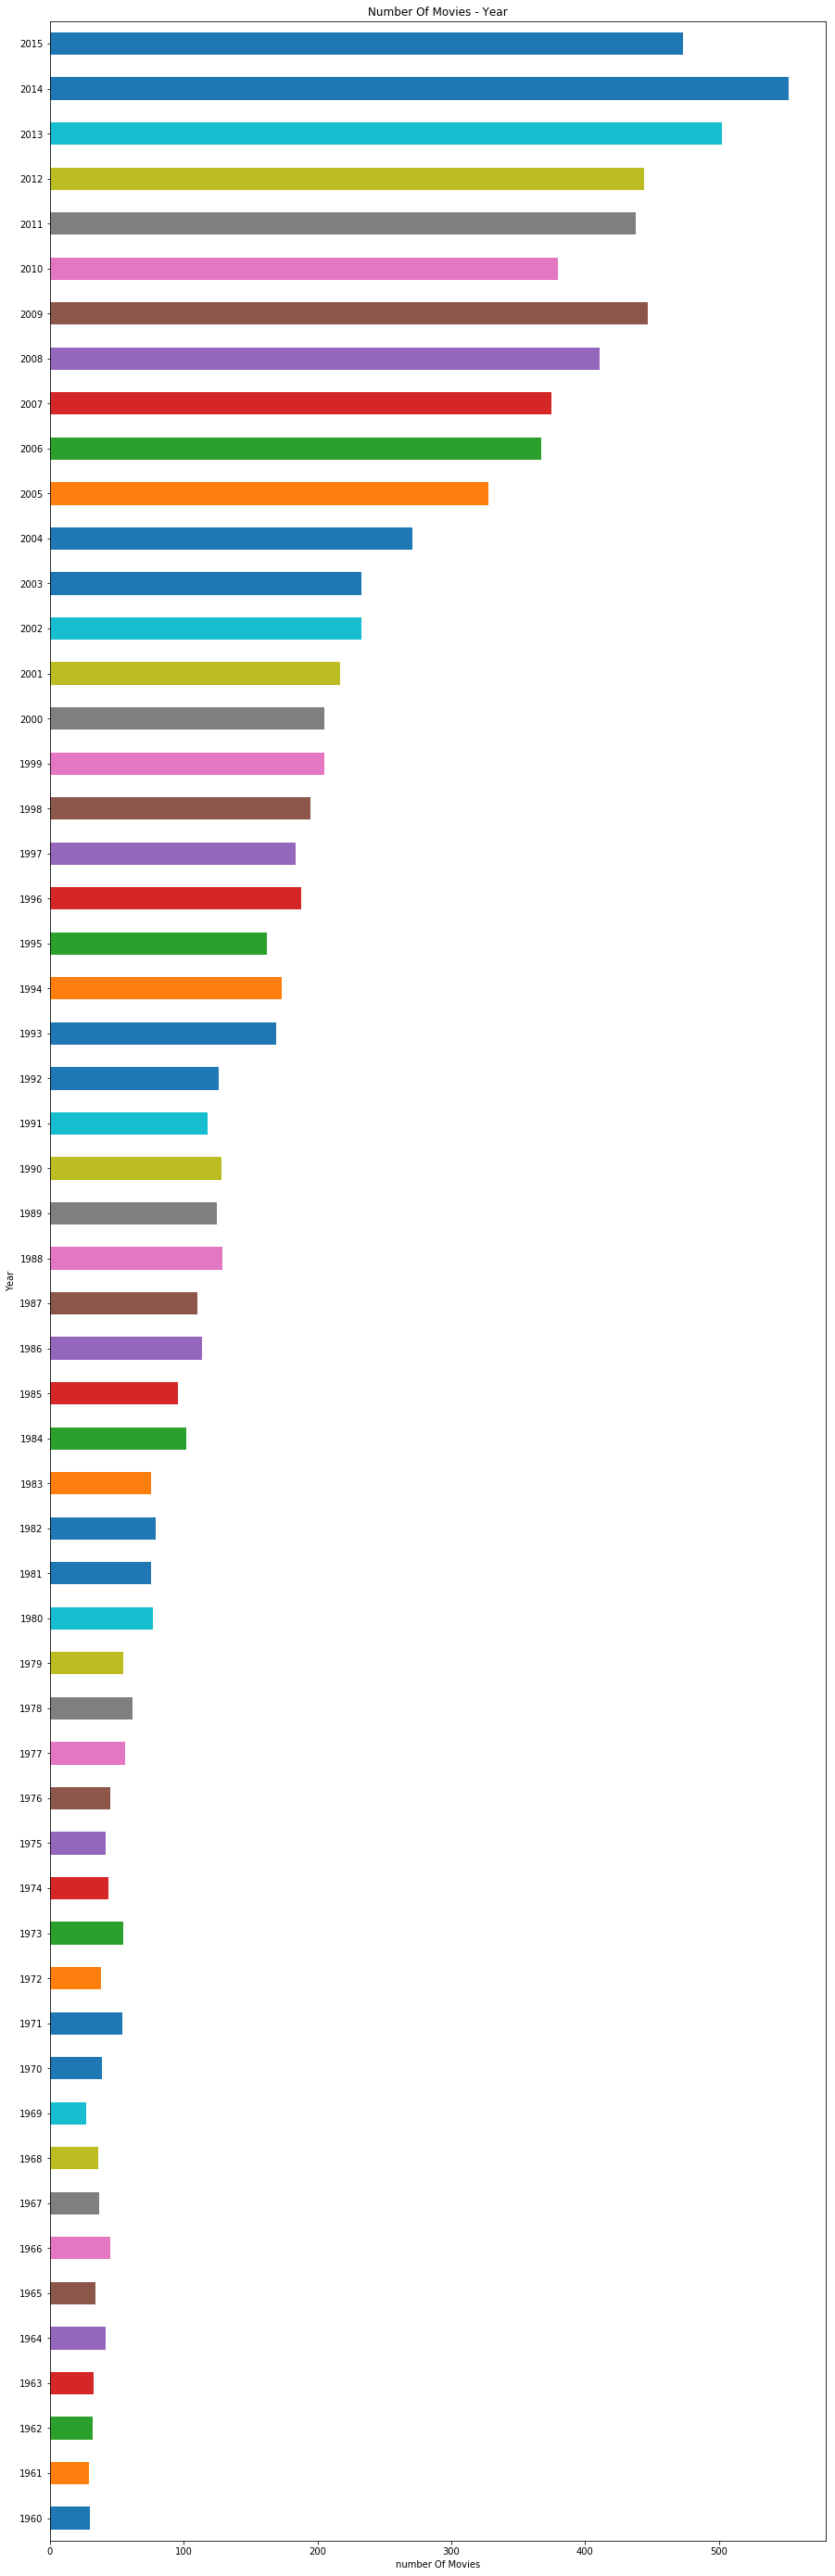

In [ ]:
# calculate the number of movies in each year (using value_counts()).
# sort years (using sort_index()).
count_movies_year = df['release_year'].value_counts().sort_index()

# visualize the result (using plot())
count_movies_year.plot(kind='barh',title='Number Of Movies - Year', figsize=(15,50))
plt.xlabel('number Of Movies')
plt.ylabel('Year')


Conclusions:

1. Film productions are increase over the years.
2. The 60s were the least years in which films were made.
3. The year 2014 was the year during which films were produced.
4. From this point, films are expected to increase each year in the future, despite the slight decrease in the number of films in 2015.

### Research Question 2  (How long is the average movie?)
- calculate the mean of average runtime of movies.
- visualize the result.

In [ ]:
#calculate the mean of average runtime of movies (using df.mean())
df["runtime"].mean()

103.34656962431767

(array([  2.54800000e+03,   6.69700000e+03,   7.70000000e+01,
          9.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   2. ,   91.8,  181.6,  271.4,  361.2,  451. ,  540.8,  630.6,
         720.4,  810.2,  900. ]),
 <a list of 10 Patch objects>)

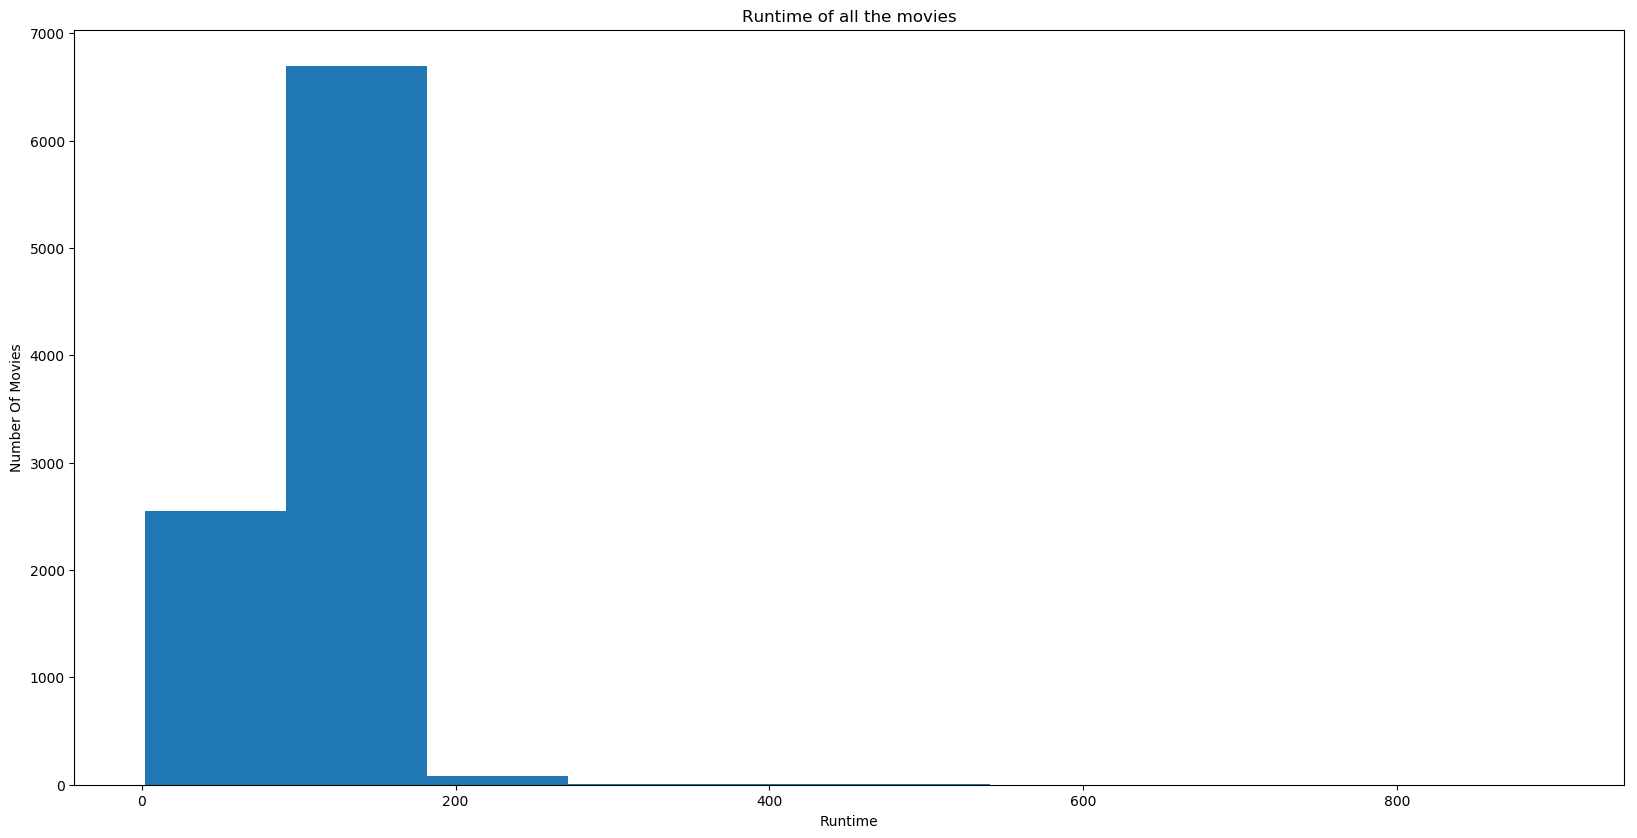

In [ ]:
# visualize the result (using plot()).
plt.figure(figsize=(20,10), dpi = 100)
plt.xlabel('Runtime')
plt.ylabel('Number Of Movies')
plt.title('Runtime of all the movies')
plt.hist(df['runtime'])

Conclusions:

1. The highest average run was about 100 minutes.
2. Most running averages were less then 200 minutes.

### Research Question 3  (Top 10 of movies Directors in 2011? "based on Movie rating")
- grouped directors with the average votes of their different movies released by them in 2011.
- sort 2011 directors based on the ratings.
- visualize the result.

In [ ]:
# Filtering the dataset to movies released in 2011 (using df.loc())
df.loc[df['release_year'].idxmax()]
df_dir=df[df['release_year'] == 2011]

# grouped directors with the average votes of their different movies (using groupby().mean().vote_average)
director_data = df_dir.groupby('director').mean().vote_average
director_data

director
Aaron Harvey                                     4.9
Aaron Woodley                                    5.5
Abel Ferrara                                     4.2
Adam Gierasch                                    4.0
Adam Green|Joe Lynch|Adam Rifkin|Tim Sullivan    5.9
Adam Wingard                                     6.6
Agnieszka Holland                                6.6
AgnÃ¨s Merlet                                    6.1
Aimee Lagos                                      5.3
Alan Brown                                       4.3
Alejandro BruguÃ©s                               6.2
Alex Chandon                                     5.3
Alex Gregory|Peter Huyck                         6.0
Alex Kendrick                                    6.7
Alex Ranarivelo                                  5.7
Alexander Payne                                  6.6
Alister Grierson                                 5.7
Ami Canaan Mann                                  5.9
Andrea Arnold                        

In [ ]:
# sort 2011 directors based on the ratings (sort_values())
sort_dir = director_data.sort_values(ascending=False)
sort_dir.head(10)

director
Mark Cousins                  9.2
Curt Morgan                   8.5
Quentin Tarantino             8.1
Richard De Aragues            7.9
Louis C.K.                    7.9
Enrico Casarosa               7.9
Ron Fricke                    7.9
Jennifer Siebel Newsom        7.8
David Gelb                    7.8
Daniel Lindsay|T.J. Martin    7.8
Name: vote_average, dtype: float64

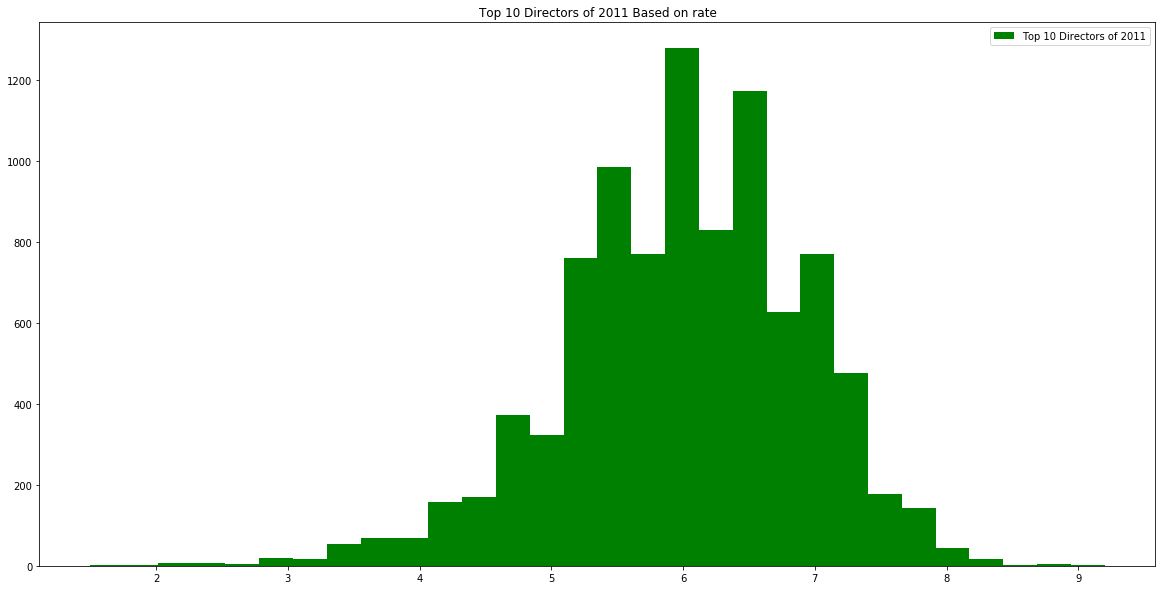

In [ ]:
# visualize the result (using plot()).
plt.subplots(figsize=(20,10))
plt.hist(df['vote_average'],stacked=False,color=['green'],bins=30,label=['Top 10 Directors of 2011'])
plt.title('Top 10 Directors of 2011 Based on rate') 
plt.legend()

Text(0,0.5,'Average ratings of movies released in 2011')

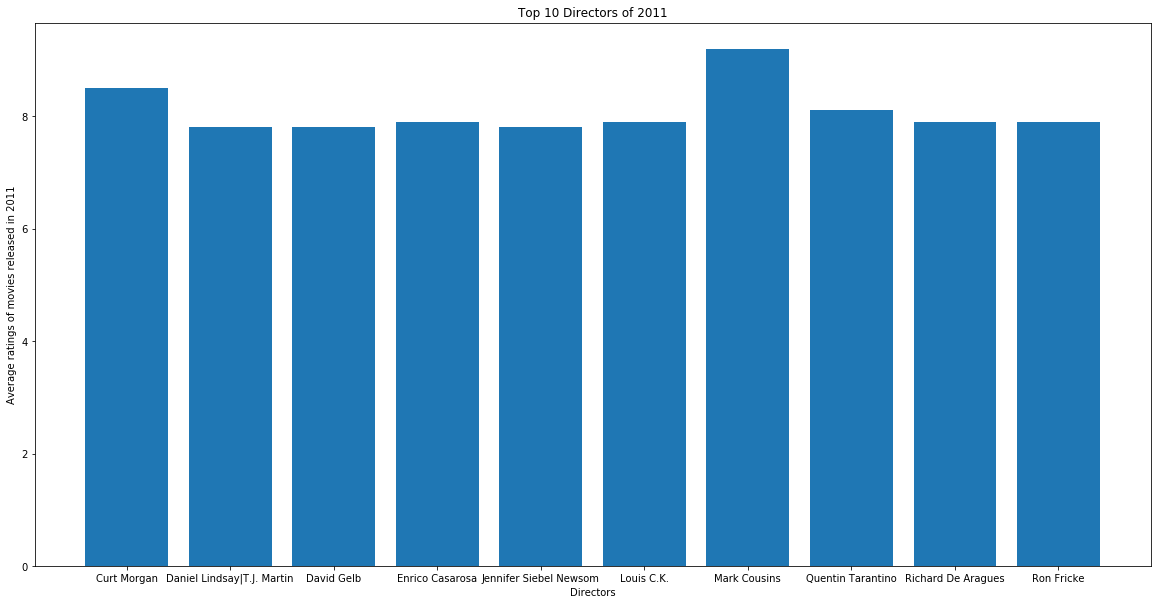

In [ ]:
# visualize the result (using plot()).
plt.subplots(figsize=(20,10))
plt.bar(sort_dir.index[:10],sort_dir[:10])
plt.title('Top 10 Directors of 2011')
plt.xlabel('Directors')
plt.ylabel('Average ratings of movies released in 2011')

Conclusions:

1. "Mark Cousins" Is the best Director in 2011 based on votes "rating 9.2", large difference compared to the rest of the differences. 
2. "Curt Morgan" Is the second Director in 2011 based on votes "rating 8.5".
3. Top 10 Directors in 2011 their rating between "9.2" and "7.8".
4. The average rating for the top 10 Directors in 2011 was "8.08".
5. The rating for 6 films has exceeded 1,200 recommendations.

<a id='conclusions'></a>
## Conclusions

Research Question 1  (Is there a relationship between the years and the number of films?)
- Film productions are increase over the years.
- The 60s were the least years in which films were made.
- The year 2014 was the year during which films were produced.
- From this point, films are expected to increase each year in the future, despite the slight decrease in the number of films in 2015.



Research Question 2  (How long is the average movie?)
- The highest average run was about 100 minutes.
- Most running averages were less then 200 minutes.



Research Question 3  (Top 10 of movies Directors in 2011? "based on Movie rating")
- "Mark Cousins" Is the best Director in 2011 based on votes "rating 9.2", large difference compared to the rest of the differences. 
- "Curt Morgan" Is the second Director in 2011 based on votes "rating 8.5".
- Top 10 Directors in 2011 their rating between "9.2" and "7.8".
- The average ratings for the top 10 Directors in 2011 was "8.08".
- The rating for 6 films has exceeded 1,200 recommendations.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1